In [2]:
#imports 

import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
%matplotlib inline
import warnings
#estimators 
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

#model metrics 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

#cross validation  


from sklearn.model_selection import train_test_split


In [6]:
#data
credit = pd.read_csv('data/dataset3.csv', header =1)

In [7]:
rawData = credit

In [8]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [9]:
rawData.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [10]:
#features
features = rawData.iloc[:,2:12]
print('Summary of feature sample -8 variales')
features.head()

Summary of feature sample -8 variales


,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,2,2,1,24,2,2,-1,-1,-2,-2
1,2,2,2,26,-1,2,0,0,0,2
2,2,2,2,34,0,0,0,0,0,0
3,2,2,1,37,0,0,0,0,0,0
4,1,2,1,57,-1,0,-1,0,0,0


In [11]:
#dependent variable definition
depVar = rawData['default payment next month']
depVar.tail()

29995    0
29996    0
29997    1
29998    1
29999    1
Name: default payment next month, dtype: int64

In [12]:
#Feature Scaling and data normalization 
normalizedfeatures=features.apply(lambda x : (x-np.mean(x))/np.std(x))
normalizedfeatures.head()

,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,0.810161,0.185828,-1.057295,-1.246020,1.794564,1.782348,-0.696663,-0.666599,-1.530046,-1.486041
1,0.810161,0.185828,0.858557,-1.029047,-0.874991,1.782348,0.138865,0.188746,0.234917,1.992316
2,0.810161,0.185828,0.858557,-0.161156,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137
3,0.810161,0.185828,-1.057295,0.164303,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137
4,-1.234323,0.185828,-1.057295,2.334029,-0.874991,0.111736,-0.696663,0.188746,0.234917,0.253137


In [13]:
#Spiliting Dataset into training(70%) and test set(30%) with normalized pre selected features
#X2 contains non normalised features 
X = normalizedfeatures
X2 = features
y = depVar

#  
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 1)

X_train.shape



(21000, 10)

In [14]:

X2_train,X2_test,y_train,y_test = train_test_split(X2,y,test_size = 0.3,random_state = 1)

X2_train.shape


(21000, 10)

In [15]:
X_test.shape


(9000, 10)

In [16]:
#Tetsing Logistic Regression Model 1
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(random_state=1)
logmodel.fit(X_train,y_train)








LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
y_pred1 = logmodel.predict(X_test)

In [42]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc1=roc_auc_score(y_test, y_pred1)
acc1 = accuracy_score(y_test, y_pred1)
prec1 = precision_score(y_test, y_pred1)
rec1 = recall_score(y_test, y_pred1)
f1 = f1_score(y_test, y_pred1)

model1 = pd.DataFrame([['Logistic Regression', acc1,prec1,rec1, f1,roc1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model1

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.807333,0.72093,0.217,0.33359,0.5965


In [19]:
# Tetsing  Stochastic Gradient Descent model2

from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='log', penalty='l1', learning_rate='optimal',random_state=1)
sgd.fit(X_train, y_train)








SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l1', power_t=0.5,
              random_state=1, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [20]:
y_pred2 = sgd.predict(X_test)
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc2=roc_auc_score(y_test, y_pred2)
acc2 = accuracy_score(y_test, y_pred2)
prec2 = precision_score(y_test, y_pred2)
rec2 = recall_score(y_test, y_pred2)
f2 = f1_score(y_test, y_pred2)

model2 = pd.DataFrame([['Stochastic Gradient Descent', acc2,prec2,rec2, f2,roc2]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model2



,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Stochastic Gradient Descent,0.813222,0.704225,0.275,0.395541,0.621


In [21]:
# Tetsing  K-Nearest Neighbour MODEL3

from sklearn.neighbors import KNeighborsClassifier
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i,n_jobs=-1)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))











Text(0, 0.5, 'Error Rate')

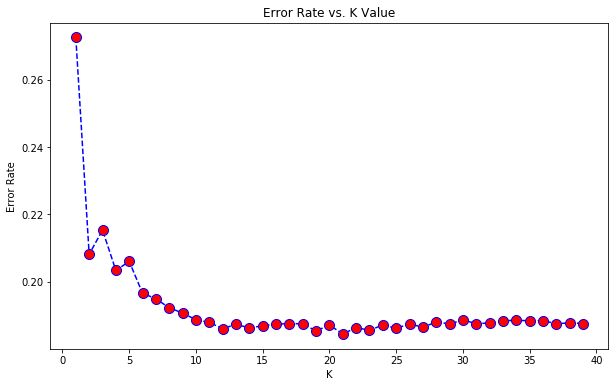

In [22]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)

In [24]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [25]:
y_pred3 = knn.predict(X_test)

In [26]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc3 =roc_auc_score(y_test, y_pred3)
acc3 = accuracy_score(y_test, y_pred3)
prec3 = precision_score(y_test, y_pred3)
rec3 = recall_score(y_test, y_pred3)
f3 = f1_score(y_test, y_pred3)

model3 = pd.DataFrame([['K-Nearest Neighbour', acc3,prec3,rec3, f3,roc3]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model3

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,K-Nearest Neighbour,0.803444,0.625135,0.2885,0.3948,0.619536


In [27]:
# Testing  Support Vector Machine  MODEL4
# Fitting SVM to the Training set
from sklearn.svm import SVC
scv = SVC(kernel = 'rbf', random_state = 0)
scv.fit(X_train, y_train)



SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [28]:
# Predicting the Test set results
y_pred4 = scv.predict(X_test)

In [29]:
from sklearn.metrics import confusion_matrix
cm4 = confusion_matrix(y_test, y_pred4)

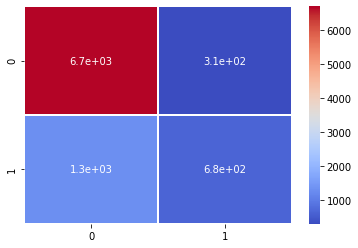

In [30]:
sns.heatmap(cm4,annot= True,linewidths=1,cmap='coolwarm')

In [31]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc4=roc_auc_score(y_test, y_pred4)
acc4 = accuracy_score(y_test, y_pred4)
prec4 = precision_score(y_test, y_pred4)
rec4 = recall_score(y_test, y_pred4)
f4 = f1_score(y_test, y_pred4)

model4 = pd.DataFrame([['Support Vector Machine', acc4,prec4,rec4, f4,roc4]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model4

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Support Vector Machine,0.818778,0.685427,0.341,0.455426,0.648143


In [32]:
#Testing Gaussian Naive Bayes MODEL5
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [33]:
y_pred5 =naive_bayes.predict(X_test)

In [34]:
from sklearn.metrics import confusion_matrix
cm5 = confusion_matrix(y_test, y_pred5)
cm5



array([[6422,  578],
       [1201,  799]])

In [35]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc5=roc_auc_score(y_test, y_pred5)
acc5 = accuracy_score(y_test, y_pred5)
prec5 = precision_score(y_test, y_pred5)
rec5 = recall_score(y_test, y_pred5)
f5 = f1_score(y_test, y_pred5)

model5= pd.DataFrame([['Gaussian Naive Bayes', acc5,prec5,rec5, f5,roc5]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model5

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Gaussian Naive Bayes,0.802333,0.580247,0.3995,0.473201,0.658464


In [36]:
#Testing Decision Tree Classification  MODEL6
from sklearn.tree import DecisionTreeClassifier
dct = DecisionTreeClassifier(criterion = 'entropy',random_state = 0)


In [37]:
dct.fit(X2_train,y_train)  #non normalised x2 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [38]:
dct.fit(X_train,y_train)  # normalised

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [39]:
y_pred6 = dct.predict(X_test)
y_pred6b = dct.predict(X2_test)  # non normali.

In [40]:
from sklearn.metrics import confusion_matrix
cm6 = confusion_matrix(y_test, y_pred6)
cm6a = confusion_matrix(y_test, y_pred6a)


NameError: name 'y_pred6a' is not defined

In [ ]:
cm6

In [ ]:
cm6a

In [44]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc6=roc_auc_score(y_test, y_pred6)
acc6 = accuracy_score(y_test, y_pred6)
prec6 = precision_score(y_test, y_pred6)
rec6 = recall_score(y_test, y_pred6)
f16 = f1_score(y_test, y_pred6)

model6a = pd.DataFrame([['Decision Tree Classifier', acc6,prec6,rec6, f16,roc6]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model6a

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Decision Tree Classifier,0.777667,0.499643,0.35,0.411644,0.624929


In [45]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc6b=roc_auc_score(y_test, y_pred6b)
acc6b = accuracy_score(y_test, y_pred6b)
prec6b = precision_score(y_test, y_pred6b)
rec6b = recall_score(y_test, y_pred6b)
f6b = f1_score(y_test, y_pred6b)

model6b = pd.DataFrame([['Decision Tree Classifier', acc6b,prec6b,rec6b, f6b,roc6b]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model6b


#

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Decision Tree Classifier,0.384556,0.166069,0.44,0.241129,0.404357


In [47]:
#Tetsing RF Model7
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100,criterion = 'entropy',random_state = 0)


In [48]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [49]:
y_pred7 = rfc.predict(X_test)

In [50]:
from sklearn.metrics import confusion_matrix
cm7 = confusion_matrix(y_test, y_pred7)


In [51]:
cm7

array([[6427,  573],
       [1290,  710]])

In [52]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc7=roc_auc_score(y_test, y_pred7)
acc7 = accuracy_score(y_test, y_pred7)
prec7 = precision_score(y_test, y_pred7)
rec7 = recall_score(y_test, y_pred7)
f7 = f1_score(y_test, y_pred7)

model7 = pd.DataFrame([['Random tree Classifier', acc7,prec7,rec7, f7,roc7]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

model7



,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Random tree Classifier,0.793,0.55339,0.355,0.432531,0.636571


In [54]:
#Test XGBOOST classifier model8


In [53]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)



XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [55]:
y_pred8 =xgb.predict(X_test)

In [56]:
from sklearn.metrics import confusion_matrix
cm8 = confusion_matrix(y_test, y_pred8)


In [57]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc8=roc_auc_score(y_test, y_pred8)
acc8 = accuracy_score(y_test, y_pred8)
prec8 = precision_score(y_test, y_pred8)
rec8 = recall_score(y_test, y_pred8)
f8 = f1_score(y_test, y_pred8)

model8 = pd.DataFrame([['XGBOOST Classifier', acc8,prec8,rec8, f8,roc8]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model8


,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,XGBOOST Classifier,0.815889,0.661945,0.3505,0.45832,0.649679


In [62]:
#*****   Grid Search and K-Fold Cross validationfor Model Optimization -> Model9

from sklearn.model_selection import GridSearchCV , cross_val_score
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score,roc_curve,auc


In [63]:
#Grid Search on Logistic Regression Model 9
logmodel_params = {'C': [0.001, 0.01, 0.1, 1, 10], 'class_weight': [None, 'balanced'], 'penalty': ['l1', 'l2']}


In [64]:
grid_search_log = GridSearchCV(estimator=logmodel,param_grid=logmodel_params,scoring='accuracy',cv=10,n_jobs=-1)

In [65]:
grid_search_log.fit (X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=1, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'class_weight': [None, 'balanced'],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [66]:
best_accuracy = grid_search_log.best_score_

In [67]:
print('Accuracy on Cross Validation set :',best_accuracy)

Accuracy on Cross Validation set : 0.8104285714285714


In [74]:
best_parameters = grid_search_log.best_params_
best_parameters

{'C': 0.1, 'class_weight': None, 'penalty': 'l2'}

In [75]:
y_pred_log = grid_search_log.predict(X_test)

In [76]:
roc9=roc_auc_score(y_test, y_pred_log)
acc9 = accuracy_score(y_test, y_pred_log)
prec9 = precision_score(y_test, y_pred_log)
rec9 = recall_score(y_test, y_pred_log)
f9 = f1_score(y_test, y_pred_log)



In [77]:
model9 =  pd.DataFrame([['Logistic Regression Tuned', acc9,prec9,rec9, f9,roc9]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model9

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression Tuned,0.807222,0.721943,0.2155,0.331921,0.595893


In [71]:
# Testing Grid Search on Stochastic Gradient Descent   -Model10


In [79]:
sgd_params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 5.0], 'class_weight': [None, 'balanced']}
grid_search_sgd = GridSearchCV(estimator=sgd,param_grid=sgd_params,scoring='accuracy',cv=5,n_jobs=-1)
grid_search_sgd = grid_search_sgd.fit(X_train,y_train)

In [80]:
best_accuracy_1 = grid_search_sgd.best_score_
print('Accuracy on Cross Validation set :',best_accuracy_1)

Accuracy on Cross Validation set : 0.8131428571428572


In [81]:
best_parameters_2 = grid_search_sgd.best_params_
best_parameters_2



{'alpha': 0.0001, 'class_weight': None}

In [82]:
y_pred_sgd = grid_search_sgd.predict(X_test)

In [83]:
sgd_prob = grid_search_sgd.predict_proba(X_test)

In [84]:
roc10=roc_auc_score(y_test, y_pred_sgd)
acc10 = accuracy_score(y_test, y_pred_sgd)
prec10 = precision_score(y_test, y_pred_sgd)
rec10 = recall_score(y_test, y_pred_sgd)
f10 = f1_score(y_test, y_pred_sgd)
model10 =  pd.DataFrame([['Stochastic Gradient Descent Tuned', acc10,prec10,rec10, f10,roc10]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model10

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Stochastic Gradient Descent Tuned,0.813222,0.704225,0.275,0.395541,0.621


In [ ]:
##)Testing Grid Search on KNN Classifier MODEL11

In [87]:
k_range = list(range(1, 30))
leaf_size = list(range(1,30))
weight_options = ['uniform', 'distance']
knn_param = {'n_neighbors': k_range, 'leaf_size': leaf_size, 'weights': weight_options}

In [88]:
grid_search = GridSearchCV(estimator = knn,param_grid = knn_param,scoring='accuracy',cv=5,n_jobs=-1)
grid_search = grid_search.fit(X_train,y_train)

In [89]:
best_accuracy_1 = grid_search.best_score_
print('Accuracy on Cross Validation set :',best_accuracy_1)

Accuracy on Cross Validation set : 0.8165714285714285


In [90]:
best_parameters11 = grid_search.best_params_
best_parameters11

{'leaf_size': 9, 'n_neighbors': 19, 'weights': 'uniform'}

In [91]:
y_pred_KNN = grid_search.predict(X_test)

In [92]:
roc11=roc_auc_score(y_test, y_pred_KNN)
acc11 = accuracy_score(y_test, y_pred_KNN)
prec11 = precision_score(y_test, y_pred_KNN)
rec11 = recall_score(y_test, y_pred_KNN)
f11 = f1_score(y_test, y_pred_KNN)
model11 =  pd.DataFrame([['KNN Model Tuned', acc11,prec11,rec11, f11,roc11]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model11


,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,KNN Model Tuned,0.814333,0.655924,0.346,0.453028,0.647071


In [ ]:
# Testing Grid Search on Random Forest Classifier Model12

In [93]:
param_grid_rf = {'n_estimators': [200, 400, 600, 1000], # 9:50
              'criterion': ['entropy', 'gini'],
              'class_weight' : ['balanced',None]}
grid_search_rf = GridSearchCV(estimator=rfc,param_grid=param_grid_rf,scoring='accuracy',cv=2,n_jobs=-1)
grid_search_rf = grid_search_rf.fit(X_train,y_train)


/home/laab/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [94]:
best_accuracy_1 = grid_search_rf.best_score_
print('Accuracy on Cross Validation set :',best_accuracy_1)

Accuracy on Cross Validation set : 0.7867619047619048


In [95]:
best_parameters_2 = grid_search_rf.best_params_
best_parameters_2


{'class_weight': None, 'criterion': 'entropy', 'n_estimators': 600}

In [96]:
y_pred_rf = grid_search_rf.predict(X_test)

In [97]:
roc12=roc_auc_score(y_test, y_pred_rf)
acc12 = accuracy_score(y_test, y_pred_rf)
prec12 = precision_score(y_test, y_pred_rf)
rec12 = recall_score(y_test, y_pred_rf)
f12 = f1_score(y_test, y_pred_rf)
model12=  pd.DataFrame([['Random Forest Tuned', acc12,prec12,rec12, f12,roc12]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model12



,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Random Forest Tuned,0.794556,0.55959,0.3545,0.434037,0.637393


In [273]:
####### Testing ROC Curve

#Receiver Operating Characteristic(ROC) summarizes the model’s performance by evaluating the trade offs between true positive rate (sensitivity) and false positive rate(1- specificity). For plotting ROC, it is advisable to assume p > 0.5 since we are more concerned about success rate.
#ROC summarizes the predictive power for all possible values of p > 0.5. The area under curve (AUC), referred to as index of accuracy(A) or concordance index, is a perfect performance metric for ROC curve. Higher the area under curve, better the prediction power of the model.


In [98]:
concat = pd.concat([model1,model2, model3, model4, model5,model6a, model6b,model7, model8, model9, model10, model11, model12])
print(concat)

                               Model  Accuracy  Precision  Recall  F1 Score  \
0                Logistic Regression  0.807333   0.720930  0.2170  0.333590   
0        Stochastic Gradient Descent  0.813222   0.704225  0.2750  0.395541   
0                K-Nearest Neighbour  0.803444   0.625135  0.2885  0.394800   
0             Support Vector Machine  0.818778   0.685427  0.3410  0.455426   
0               Gaussian Naive Bayes  0.802333   0.580247  0.3995  0.473201   
0           Decision Tree Classifier  0.777667   0.499643  0.3500  0.411644   
0           Decision Tree Classifier  0.384556   0.166069  0.4400  0.241129   
0             Random tree Classifier  0.793000   0.553390  0.3550  0.432531   
0                 XGBOOST Classifier  0.815889   0.661945  0.3505  0.458320   
0          Logistic Regression Tuned  0.807222   0.721943  0.2155  0.331921   
0  Stochastic Gradient Descent Tuned  0.813222   0.704225  0.2750  0.395541   
0                    KNN Model Tuned  0.814333   0.6